In [42]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy

In [43]:
data1 = np.loadtxt("C:/Users/Arseny/Documents/GitHub/python_solution/labmrzl/Lab 3/data/data_clustering.txt", delimiter=',')

In [44]:
data1

array([[ 2.08,  1.05],
       [ 2.05,  7.7 ],
       [ 4.53,  5.49],
       [ 6.23,  1.02],
       [ 5.35,  7.86],
       [ 2.88,  0.79],
       [ 2.32,  8.5 ],
       [ 5.06,  5.65],
       [ 5.38,  3.53],
       [ 6.31,  9.73],
       [ 3.41,  2.05],
       [ 1.75,  7.38],
       [ 3.88,  5.73],
       [ 7.22,  2.88],
       [ 5.85,  9.11],
       [ 3.66,  2.38],
       [ 0.45,  7.99],
       [ 6.01,  5.83],
       [ 7.06,  2.41],
       [ 7.47,  8.97],
       [ 2.2 ,  2.71],
       [ 2.94,  8.71],
       [ 5.87,  4.56],
       [ 4.57,  1.33],
       [ 5.84,  6.54],
       [ 3.4 ,  1.  ],
       [ 1.44,  8.26],
       [ 4.29,  4.69],
       [ 8.09,  1.99],
       [ 6.48,  9.44],
       [ 2.94,  1.78],
       [ 0.41,  9.14],
       [ 5.42,  4.08],
       [ 7.47,  2.15],
       [ 5.62,  7.65],
       [ 3.71,  1.26],
       [ 0.41,  8.9 ],
       [ 4.93,  5.73],
       [ 7.23,  0.14],
       [ 6.77,  9.09],
       [ 3.23,  2.64],
       [ 1.61,  7.85],
       [ 4.7 ,  4.78],
       [ 6.

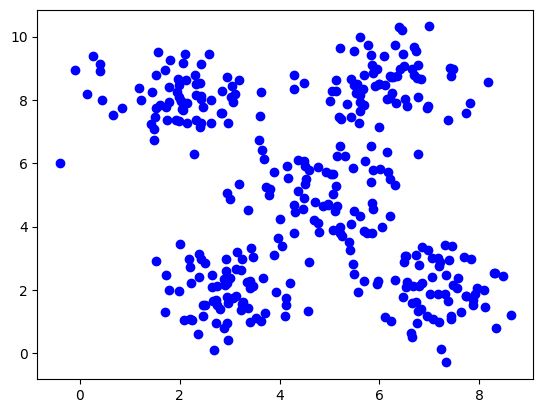

In [45]:
plt.plot(data1[:,0],data1[:,1], 'bo')

In [46]:
import sklearn.cluster
k_means = sklearn.cluster.KMeans(n_clusters=5, init='random', n_init=10)

In [47]:
labels = k_means.fit_predict(data1)

In [48]:
centroids = k_means.cluster_centers_

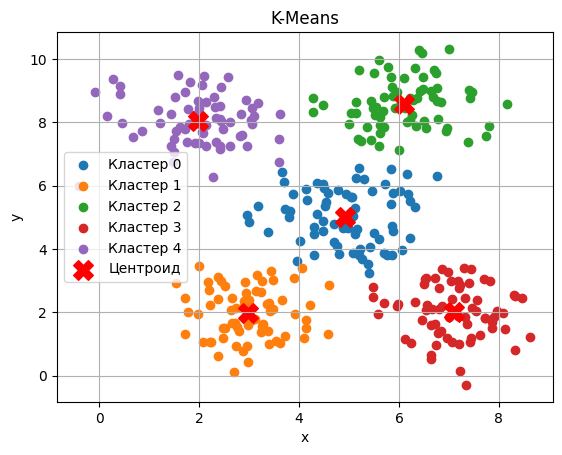

In [49]:
for cluster_id in range(5):
    cluster_points = data1[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {cluster_id}')


plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Центроид')

plt.title('K-Means')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import sklearn.metrics


k_means_dbscore = sklearn.metrics.davies_bouldin_score(data1,k_means.labels)
print(f"Davies Bouldin score for K-Means: {k_means_dbscore}")

Davies Bouldin score for K-Means: 0.5512578179872214


In [51]:
bandwidth = sklearn.cluster.estimate_bandwidth(data1, quantile=0.2)

In [52]:
bandwidth

2.3472629261290883

In [53]:
forel = sklearn.cluster.MeanShift(bandwidth=bandwidth)

In [54]:
labels = forel.fit_predict(data1)

In [55]:
centroids = forel.cluster_centers_

In [56]:
centroids

array([[4.26835165, 3.99967033],
       [6.81320988, 2.35444444],
       [6.07428571, 8.37909091],
       [3.00410959, 2.02041096],
       [2.13478873, 8.05690141]])

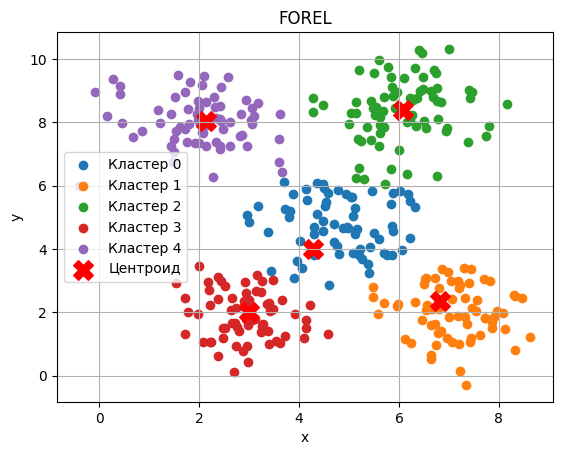

In [57]:
for cluster_id in range(5):
    cluster_points = data1[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {cluster_id}')


plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Центроид')

plt.title('FOREL')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
forel_db_score = sklearn.metrics.davies_bouldin_score(data1, forel.labels_)
print(f"Davies-Bouldin Index (MeanShift): {forel_db_score}")


Davies-Bouldin Index (MeanShift): 0.5626335814812566


In [59]:
agglomerativeclust = sklearn.cluster.AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels = agglomerativeclust.fit(data1)


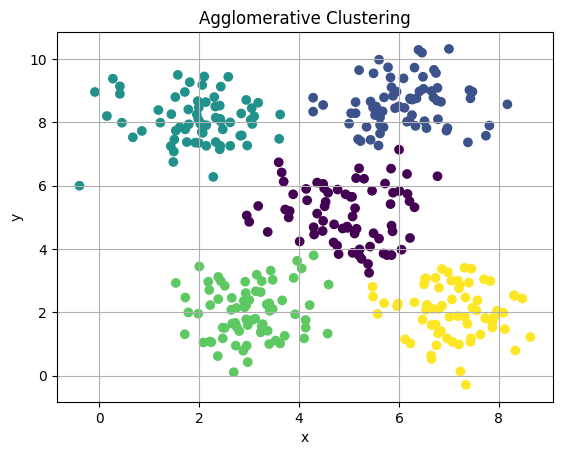

In [60]:
plt.scatter(data1[:,0], data1[:,1], c=agglomerativeclust.labels_)   
plt.title('Agglomerative Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [61]:
linkings = scipy.cluster.hierarchy.linkage(data1, method ='ward')

Text(0.5, 1.0, 'Dendrogram')

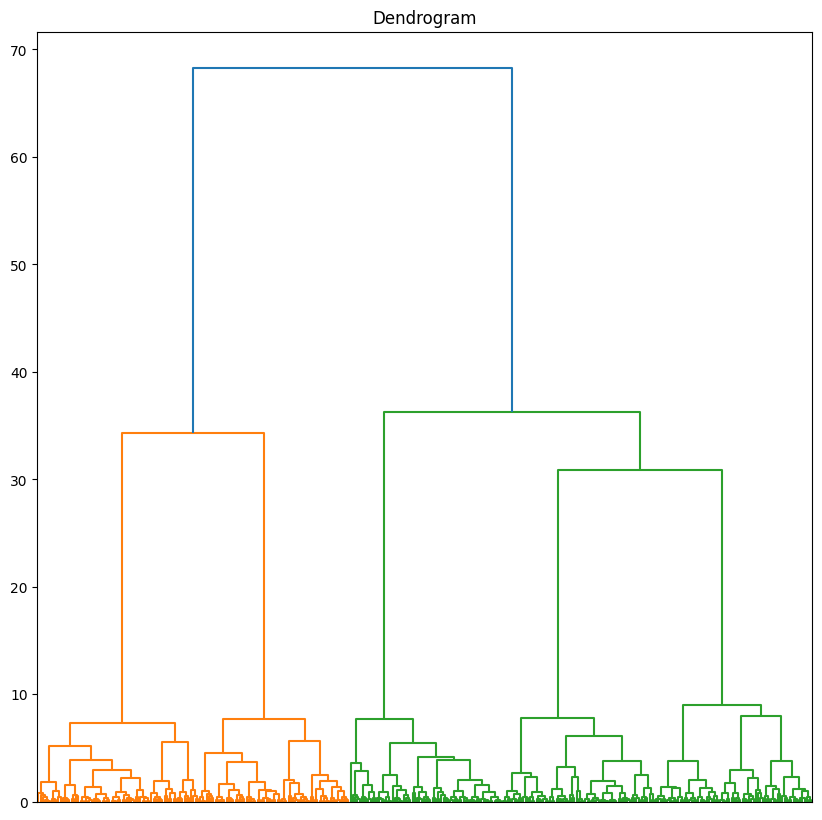

In [62]:
plt.figure(figsize=(10,10))
scipy.cluster.hierarchy.dendrogram(linkings,no_labels=True)
plt.title("Dendrogram")

In [64]:
agglomerative_db_score = sklearn.metrics.davies_bouldin_score(data1, agglomerativeclust.labels_)
print(f"Davies-Bouldin Index (MeanShift): {agglomerative_db_score}")

Davies-Bouldin Index (MeanShift): 0.5575460367433396
